# Tipos de Error 

Recordemos que al usar un método numérico, ya no se tiene una solución exacta, pues estamos haciendo una aproximación de la derivada:

$$\frac{dx}{dt}\approx \frac{x(t+h)-x(t)}{h}$$

Una pregunta natural sería, ¿Cómo saber cuánto me equivoco?

**¿Qué es un error?**

Para hablar de error, tenemos que hablar sobre cantidades exactas y aproximadas.

¿Qué es una cantidad exacta?

Si $x=3$ metros, y tenemos certeza de que esa medida es exacta, entonces se conoce como el valor verdadero.

**Ejemplo:**

$\pi$ es exacto.

Por supuesto, su calculadora, le dará sólo una aproximación del número real.

##  Error Absoluto

$$\text{Error Absoluto}=|cantidad_{real} - cantidad_{aproximada}|$$

**Ejemplo:**

$x_{real}=3$ y yo **medí** $x_{aprox}=3.02$.

Entonces

$$\text{Error Absoluto}=|3 - 3.02|=|-0.02|=0.02 \text{ metros}$$

## Error Relativo

$$\text{Error Relativo}=\frac{|cantidad_{real} - cantidad_{aproximada}|}{|cantidad_{real}|}$$

**Problema Interesante**

Supongamos que tenemos las siguientes mediciones:

**Montaña:**

$x_{real}=10000$ metros

$x_{aprox}=9999$ metros

**Laboratorio**

$x_{real}=10$ centímetros

$x_{aprox}=9$ centímetros

**¿Quién se equivocó más?**

In [1]:
def E_Abs(real,aprox):
    er_abs=abs(real-aprox)
    return er_abs

def E_Rela(real,aprox):
    er_rel=abs(real-aprox)/abs(real)
    return er_rel

In [2]:
# Mediciones de la montaña
m1=1000
m2=999

# Mediciones del laboratorio
l1=10
l2=9

er_mabs=E_Abs(m1,m2)
er_labs=E_Abs(l1,l2)

er_mrel=E_Rela(m1,m2)
er_lrel=E_Rela(l1,l2)

print("El error absoluto de la montaña es:",er_mabs, "metros")
print("El error absoluto del laboratorio es:",er_labs,"centímetros\n")

print("El error relativo de la montaña es:",er_mrel*100,"%")
print("El error relativo del laboratorio es:",er_lrel*100,"%")

El error absoluto de la montaña es: 1 metros
El error absoluto del laboratorio es: 1 centímetros

El error relativo de la montaña es: 0.1 %
El error relativo del laboratorio es: 10.0 %


## Ejemplo con un modelo poblacional 



Recordemos nuestro modelo básico de población:

$$\frac{dP}{dt}=kP,\text{     }P(t_{0})=P_{0}$$


Supongamos que 

$k=0.03$

$P_0=2$

Recuerde que ésta ecuación se puede solucionar analíticamente:

$$P(t)=P_{0}e^{kt}$$

En nuestro caso MUY PARTICULAR, tenemos

$$P(t)=2e^{0.03t}$$

**Usemos el método de Euler para calcular los errores de aproximación:**

In [3]:
def EulerM(f,x0,T,n):
    t=np.linspace(T[0],T[1],n)
    h=abs(t[1]-t[0])
    x=np.empty(n)
    x[0]=x0
    
    for i in range(n-1):
        x[i+1]=x[i]+h*f(t[i],x[i])
    return t,x

In [4]:
import numpy as np
# Constantes fisicas
k=0.03
# Modelo
f=lambda t,P:k*P
# Intervalo de tiempo
T=[0,1000]
#Condicion incial
P0=2
#pr. numericos
n=10**6
# usando el mpetodo numérico (SOLVER, CAJA NEGRA, MAGIA)
t,P=EulerM(f,P0,T,n)
# Solución exacta (SOLO SI EXISTE)
P_ex=P0*np.exp(k*t)

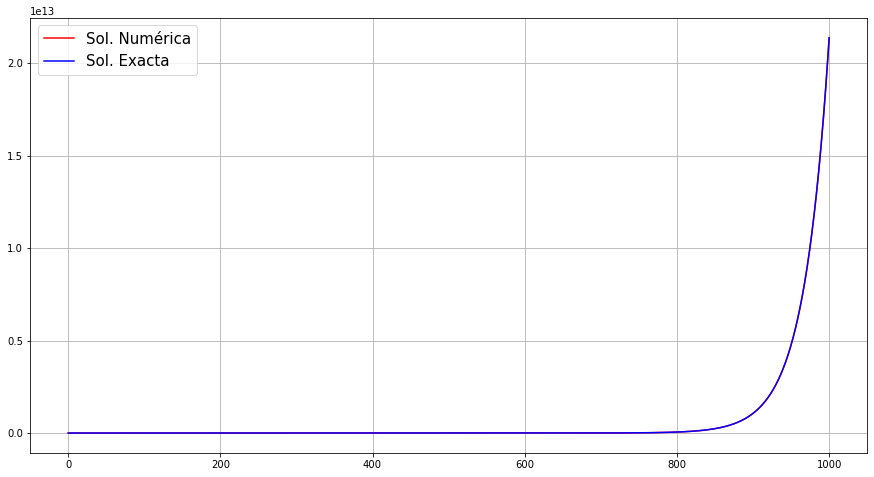

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(t,P,'r',label="Sol. Numérica")
plt.plot(t,P_ex,'b',label="Sol. Exacta")
plt.grid()
plt.legend(fontsize=15)
plt.show()

## Calcular los errores de aproximación 

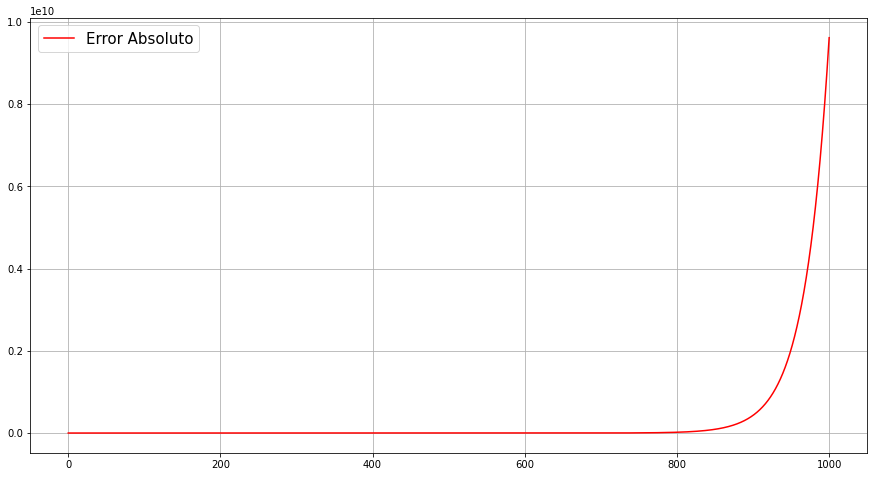

In [6]:
# Error Absoluto
e_abs=E_Abs(P_ex,P)
#print(e_abs)

plt.figure(figsize=(15,8))
plt.plot(t,e_abs,'r',label="Error Absoluto")
plt.grid()
plt.legend(fontsize=15)
plt.show()

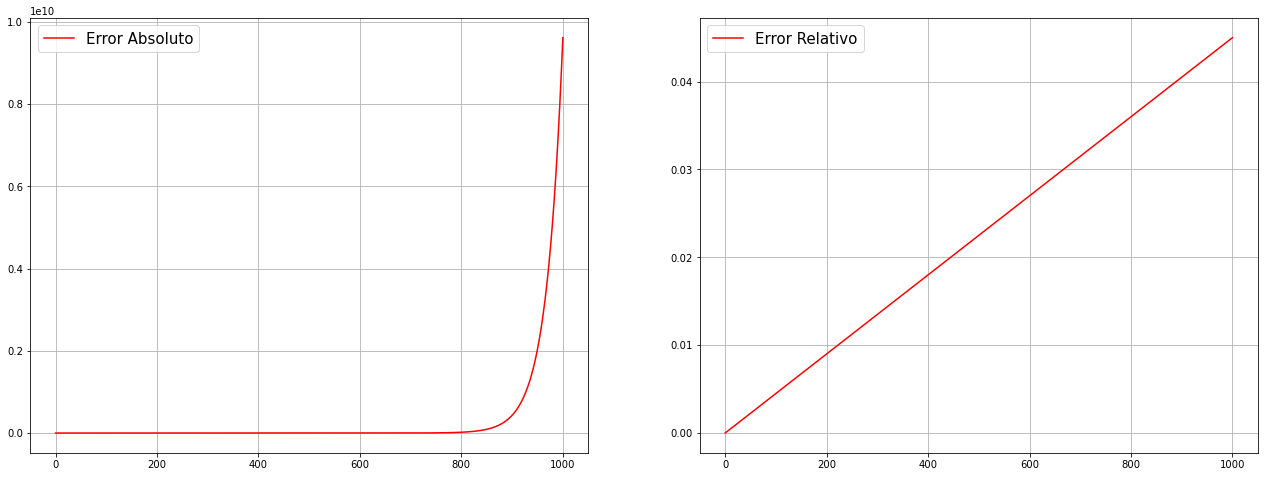

In [7]:
# Error Absoluto
e_rel=E_Rela(P_ex,P)
#print(e_abs)

plt.figure(figsize=(22,8))
plt.subplot(121)
plt.plot(t,e_abs,'r',label="Error Absoluto")
plt.grid()
plt.legend(fontsize=15)

plt.subplot(122)
plt.plot(t,e_rel*100,'r',label="Error Relativo")
plt.grid()
plt.legend(fontsize=15)
plt.show()

## Error Global 

In [8]:
def ECM(real,aprox):
    ecm=((real-aprox)**2).mean()
    return ecm

In [9]:
ecm=ECM(P_ex,P)
print("Error Cuadrático Medio",ecm)

Error Cuadrático Medio 1.4905042152611625e+18
